PERCEPTRON / ADALINE MODEL

( Week 2 Assignment - Aditi Aatmaja (N14676129) )

In [1]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["species"])


Filtering 2 classes (Sentosa and Versicolor) & 2 features : Sepal length and Petal Length

In [35]:
import numpy as np
X_filtered = X.iloc[:100, [0, 2]]  
y_filtered = y.iloc[:100, :]
y_filtered = np.where(y_filtered == 0, -1, 1)  


In [37]:
import numpy as np
X_filtered = X.iloc[:100, [0, 2]] 
y_filtered = y.iloc[:100, :]
y_filtered = np.where(y_filtered == 0, -1, 1)  


Training Perceptron Model

In [36]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_filtered.values, y_filtered)


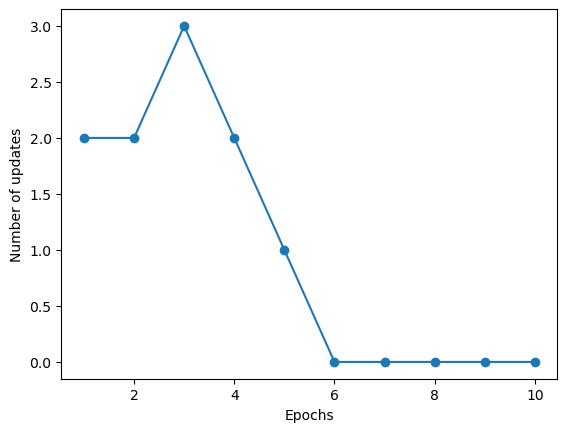

In [5]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()


Training Adaline Model

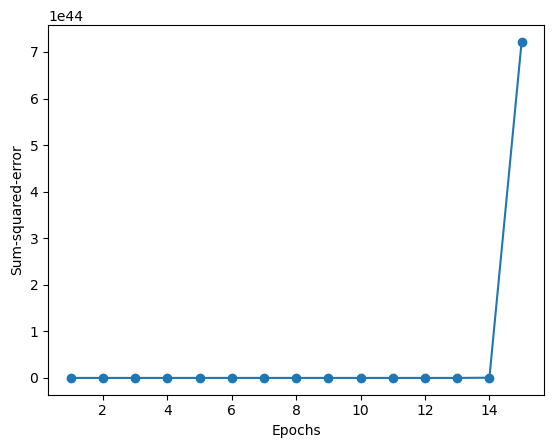

In [38]:
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
       
    adal = AdalineGD(eta=0.01, n_iter=15)
    adal.fit(X_filtered.values, y_filtered.ravel())

   
    plt.plot(range(1, len(adal.cost_) + 1), adal.cost_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-squared-error')
    plt.show()


Select 3 features: Sepal length, Sepal width, Petal length

In [52]:
X_filtered_3_features = X.iloc[:100, [0, 1, 2]] 


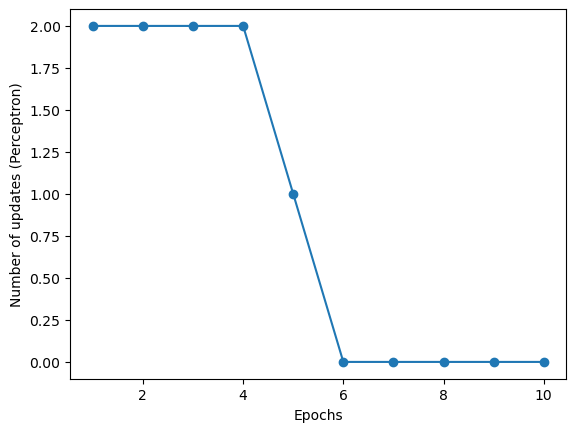

In [11]:
ppn.fit(X_filtered_3_features.values, y_filtered.ravel())

# Plot number of errors for Perceptron
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates (Perceptron)')
plt.show()


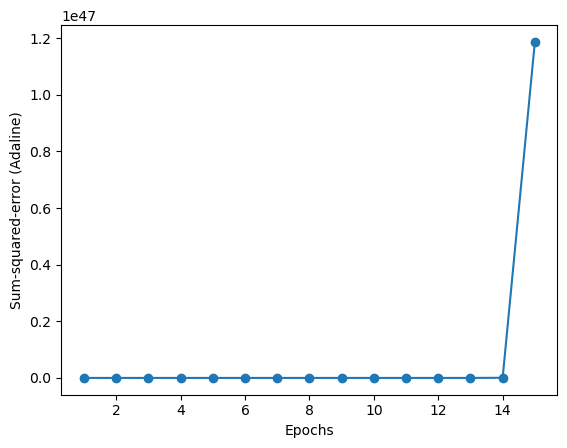

In [12]:
adal.fit(X_filtered_3_features.values, y_filtered.ravel())

# Plot cost for Adaline
plt.plot(range(1, len(adal.cost_) + 1), adal.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error (Adaline)')
plt.show()


All Features

In [40]:
X_filtered_all_features = X.iloc[:100, [0, 1, 2, 3]] 


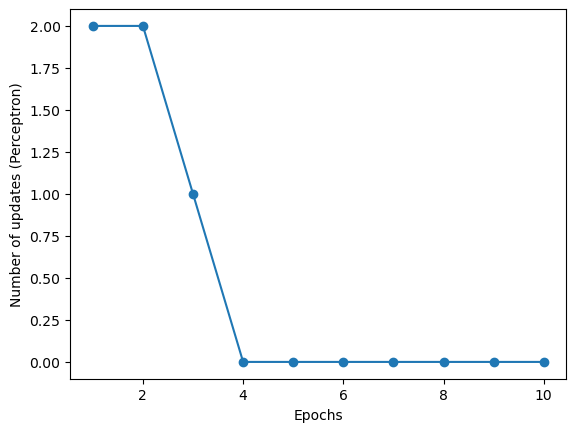

In [14]:
ppn.fit(X_filtered_all_features.values, y_filtered.ravel())

# Plot number of errors for Perceptron
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates (Perceptron)')
plt.show()


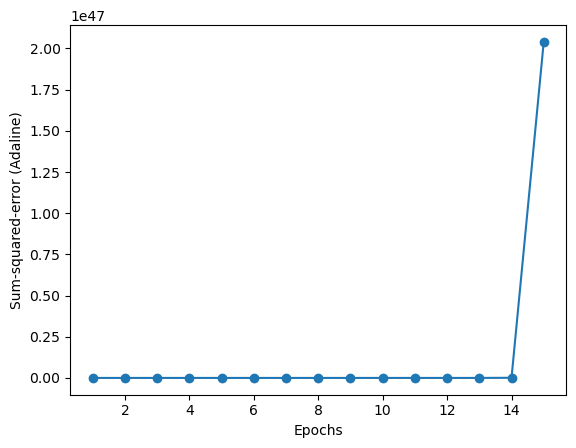

In [15]:
adal.fit(X_filtered_all_features.values, y_filtered.ravel())

# Plot cost for Adaline
plt.plot(range(1, len(adal.cost_) + 1), adal.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error (Adaline)')
plt.show()


Selecting non-linearly separable species

In [42]:
X_non_linear = X.iloc[50:150, [0, 2]]  
y_non_linear = y.iloc[50:150, :].values  # Convert to numpy array and flatten the array
y_non_linear = y_non_linear.ravel()      


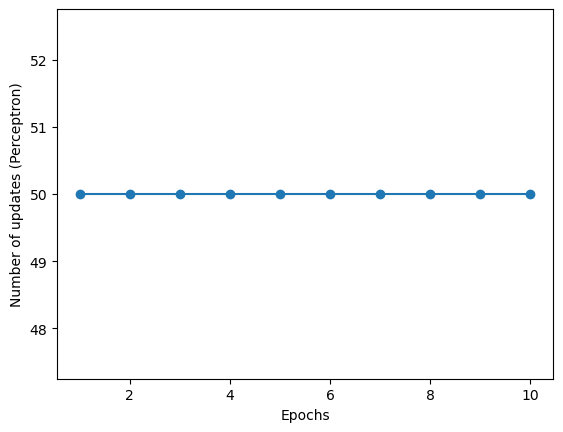

In [19]:
ppn.fit(X_non_linear.values, y_non_linear)

# Plot number of errors for Perceptron
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates (Perceptron)')
plt.show()


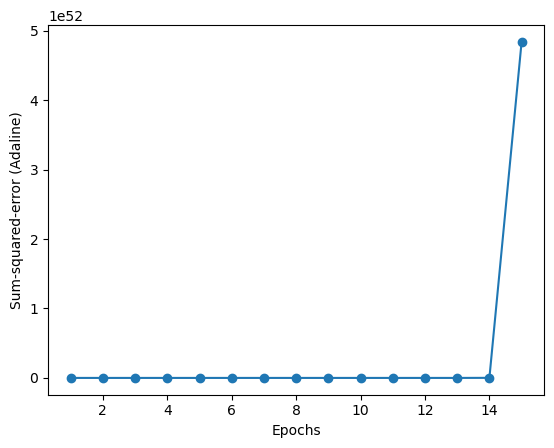

In [20]:
adal.fit(X_non_linear.values, y_non_linear)

# Plot cost for Adaline
plt.plot(range(1, len(adal.cost_) + 1), adal.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error (Adaline)')
plt.show()


Using 3 features

In [43]:
X_non_linear_3_features = X.iloc[50:150, [0, 1, 2]]  


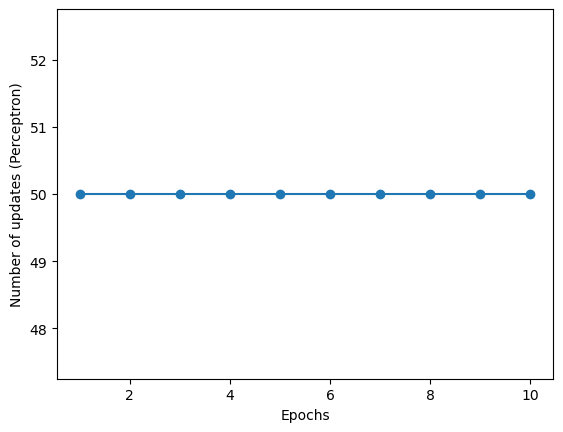

In [44]:
ppn.fit(X_non_linear_3_features.values, y_non_linear.ravel())

# Plot number of errors for Perceptron
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates (Perceptron)')
plt.show()


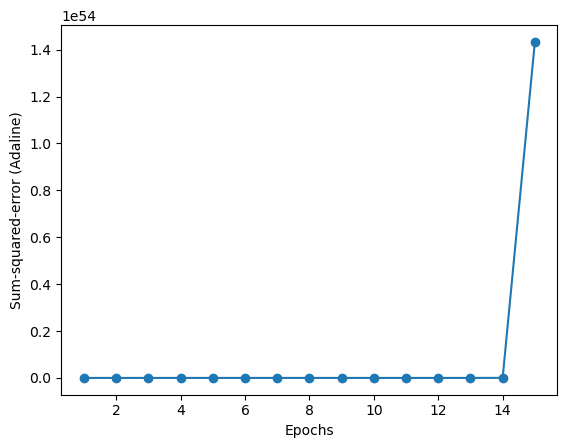

In [45]:
adal.fit(X_non_linear_3_features.values, y_non_linear.ravel())

# Plot cost for Adaline
plt.plot(range(1, len(adal.cost_) + 1), adal.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error (Adaline)')
plt.show()


Using all 4 features

In [47]:
X_non_linear_all_features = X.iloc[50:150, [0, 1, 2, 3]] 


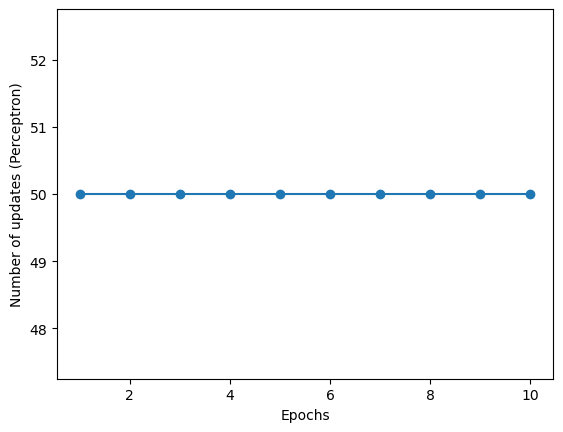

In [48]:
ppn.fit(X_non_linear_all_features.values, y_non_linear.ravel())

# Plot number of errors for Perceptron
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates (Perceptron)')
plt.show()


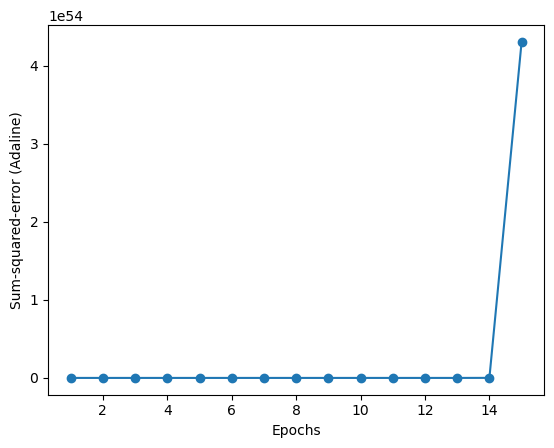

In [49]:
adal.fit(X_non_linear_all_features.values, y_non_linear.ravel())

# Plot cost for Adaline
plt.plot(range(1, len(adal.cost_) + 1), adal.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error (Adaline)')
plt.show()


In [28]:
print(X_non_linear_3_features.head())
print(X_non_linear_all_features.head())


    sepal length (cm)  sepal width (cm)  petal length (cm)
50                7.0               3.2                4.7
51                6.4               3.2                4.5
52                6.9               3.1                4.9
53                5.5               2.3                4.0
54                6.5               2.8                4.6
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
50                7.0               3.2                4.7               1.4
51                6.4               3.2                4.5               1.5
52                6.9               3.1                4.9               1.5
53                5.5               2.3                4.0               1.3
54                6.5               2.8                4.6               1.5


Comparison

In [50]:
# Train Perceptron and Adaline for 3 Features
ppn_3_features = Perceptron(eta=0.01, n_iter=15)
ppn_3_features.fit(X_non_linear_3_features.values, y_non_linear)
adal_3_features = AdalineGD(eta=0.01, n_iter=15)
adal_3_features.fit(X_non_linear_3_features.values, y_non_linear)

# Train Perceptron and Adaline for All Features
ppn_all_features = Perceptron(eta=0.01, n_iter=15)
ppn_all_features.fit(X_non_linear_all_features.values, y_non_linear)
adal_all_features = AdalineGD(eta=0.01, n_iter=15)
adal_all_features.fit(X_non_linear_all_features.values, y_non_linear)

# Compare Final Error Metrics
print("Perceptron Errors for Three Features:", ppn_3_features.errors_[-1])
print("Adaline Cost for Three Features:", adal_3_features.cost_[-1])

print("Perceptron Errors for All Features:", ppn_all_features.errors_[-1])
print("Adaline Cost for All Features:", adal_all_features.cost_[-1])


Perceptron Errors for Three Features: 50
Adaline Cost for Three Features: 1.432817318729764e+54
Perceptron Errors for All Features: 50
Adaline Cost for All Features: 4.305515502994583e+54


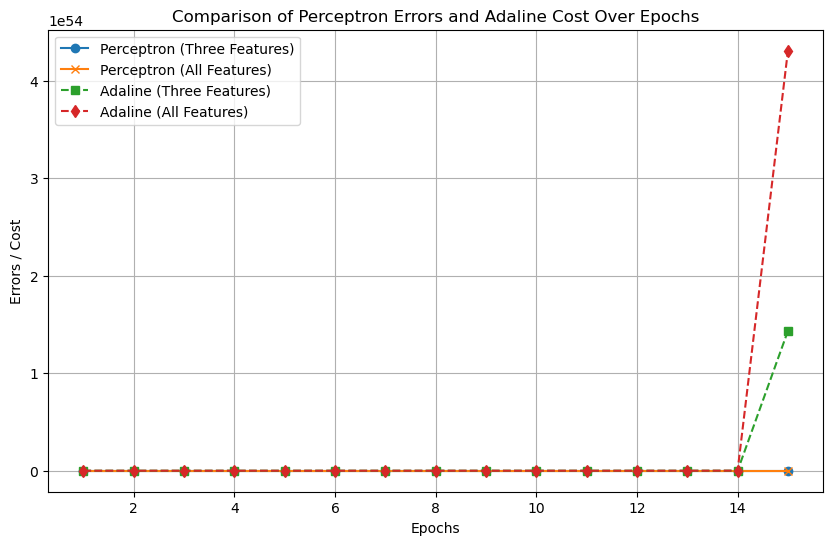

In [51]:
# Plotting the Perceptron and Adaline metrics over epochs for both feature sets
plt.figure(figsize=(10, 6))

# Perceptron (Errors over epochs)
plt.plot(range(1, len(ppn_3_features.errors_) + 1), ppn_3_features.errors_, marker='o', label='Perceptron (Three Features)')
plt.plot(range(1, len(ppn_all_features.errors_) + 1), ppn_all_features.errors_, marker='x', label='Perceptron (All Features)')

# Adaline (Cost over epochs)
plt.plot(range(1, len(adal_3_features.cost_) + 1), adal_3_features.cost_, marker='s', label='Adaline (Three Features)', linestyle='--')
plt.plot(range(1, len(adal_all_features.cost_) + 1), adal_all_features.cost_, marker='d', label='Adaline (All Features)', linestyle='--')

# plotting the graph 
plt.title('Comparison of Perceptron Errors and Adaline Cost Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Errors / Cost')
plt.legend()
plt.grid(True)
plt.show()


Conclusion: 


Perceptron: The Perceptron model converges faster for linearly separable data but may not perform well for non-linearly separable data, so that is leaving residual errors (misclassifications) that do not improve.

Adaline: The Adaline model, by minimizing the sum-squared error, has smoother convergence. While it takes into account the margin of error more finely. But it might still struggle with non-linearly separable data without enough iterations.